In [1]:
!pip install pandas statsmodels scikit-learn matplotlib


In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/Busduct1_MFM_2024-02-07-18-59-40.csv')

In [4]:
df = df[['BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B']].dropna()


In [12]:
train, test = train_test_split(df, train_size=0.8, shuffle=False)

# Function to fit and forecast using ARIMA
def arima_forecast(train, test, col, order=(5,1,0)):
    model = ARIMA(train[col], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return forecast

In [13]:
def sarima_forecast(train, test, col, order=(1,1,1), seasonal_order=(1,1,1,12)):
    model = SARIMAX(train[col], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA MSE for BUSDUCT1 Current R: 163.79565485099383
SARIMA MSE for BUSDUCT1 Current R: 111.16139872026237


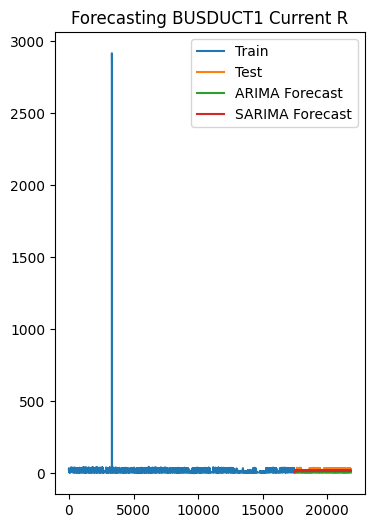

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA MSE for BUSDUCT1 Current Y: 141.7884981090145
SARIMA MSE for BUSDUCT1 Current Y: 190.31519045786712


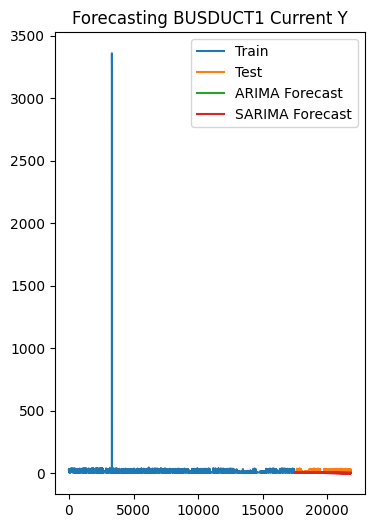

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA MSE for BUSDUCT1 Current B: 187.19954078323966
SARIMA MSE for BUSDUCT1 Current B: 258.34103815462834


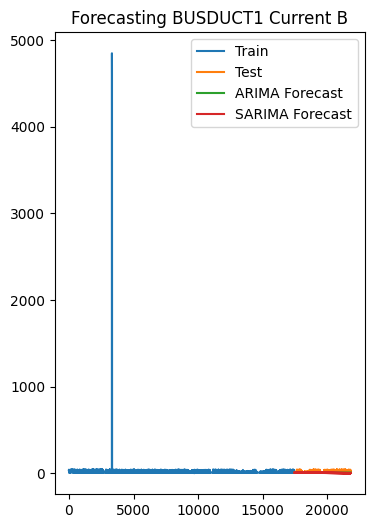

In [17]:
columns = ["BUSDUCT1 Current R", "BUSDUCT1 Current Y", "BUSDUCT1 Current B"]
for col in columns:
    arima_pred = arima_forecast(train, test, col)
    sarima_pred = sarima_forecast(train, test, col)

    mse_arima = mean_squared_error(test[col], arima_pred)
    mse_sarima = mean_squared_error(test[col], sarima_pred)

    print(f'ARIMA MSE for {col}: {mse_arima}')
    print(f'SARIMA MSE for {col}: {mse_sarima}')
    plt.figure(figsize=(4, 6))
    plt.plot(train.index, train[col], label='Train')
    plt.plot(test.index, test[col], label='Test')
    plt.plot(test.index, arima_pred, label='ARIMA Forecast')
    plt.plot(test.index, sarima_pred, label='SARIMA Forecast')
    plt.title(f'Forecasting {col}')
    plt.legend()
    plt.show()

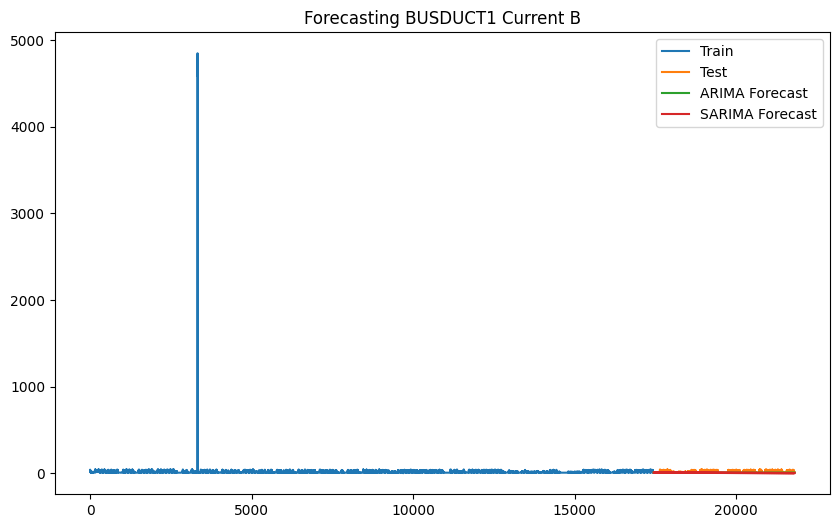

In [15]:
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train[col], label='Train')
    plt.plot(test.index, test[col], label='Test')
    plt.plot(test.index, arima_pred, label='ARIMA Forecast')
    plt.plot(test.index, sarima_pred, label='SARIMA Forecast')
    plt.title(f'Forecasting {col}')
    plt.legend()
    plt.show()